In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer

#sklearn has lot of supervised learning algortihms but we are considering only lineardiscriminant analysis here 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
p1 = pd.read_csv('Company(FRA).csv')

#Glimpse of Data
p1.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [3]:
p1.columns = p1.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [4]:
p1.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [5]:
print('The number of rows (observations) is',p1.shape[0],'\n''The number of columns (variables) is',p1.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [6]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [7]:
p1.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,4256.000000,4256.000000,4.256000e+03,4256.000000,4.025000e+03,3706.000000,4.091000e+03,4102.000000,4102.000000,4102.000000,...,3871.000000,3382.000000,3492.000000,3828.000000,3.446000e+03,3446.000000,4256.000000,4256.000000,4.256000e+03,1629.000000
mean,2128.500000,1344.740883,3.573617e+03,1351.949601,4.688190e+03,43.702482,4.356301e+03,295.050585,605.940639,410.259044,...,17.929029,84.369988,28.684513,17.733926,2.376491e+07,-1094.828671,-196.217467,-197.527608,3.573617e+03,55.462290
std,1228.745702,15936.743168,3.007444e+04,12961.311651,5.391895e+04,436.915048,5.139809e+04,3079.902071,5646.230633,4217.415307,...,90.164435,562.637359,169.650915,343.125864,1.709790e+08,34101.358644,13061.953425,13061.929512,3.007444e+04,1304.445296
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.300000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,1064.750000,3.975000,9.130000e+01,31.475000,1.071000e+02,-1.800000,9.680000e+01,0.500000,6.925000,0.800000,...,3.810000,8.190000,5.100000,3.020000,1.308382e+06,10.000000,0.000000,0.000000,9.130000e+01,2.970000
50%,2128.500000,72.100000,3.155000e+02,104.800000,4.551000e+02,1.600000,4.268000e+02,9.000000,36.900000,12.600000,...,6.470000,17.320000,9.860000,6.410000,4.750000e+06,10.000000,1.490000,1.240000,3.155000e+02,8.690000
75%,3192.250000,330.825000,1.120800e+03,389.850000,1.485000e+03,18.400000,1.395700e+03,53.300000,158.700000,74.175000,...,11.850000,40.012500,20.240000,11.822500,1.090602e+07,10.000000,10.000000,7.615000,1.120800e+03,17.000000
max,4256.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.100000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [8]:
p1.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_inco

In [9]:
dup= p1.duplicated()
print(" There are ", dup.sum(), "duplicates")

 There are  0 duplicates


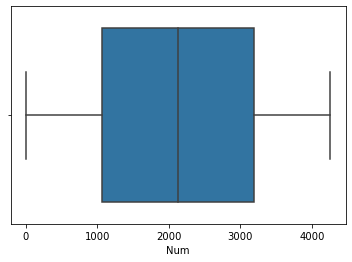

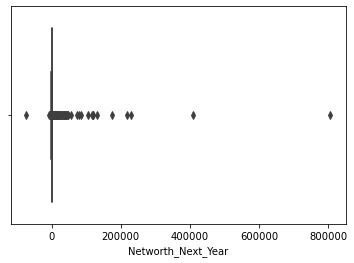

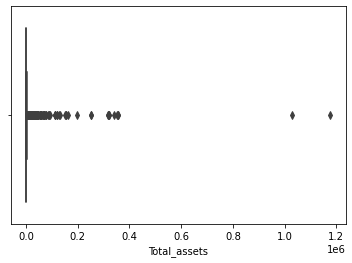

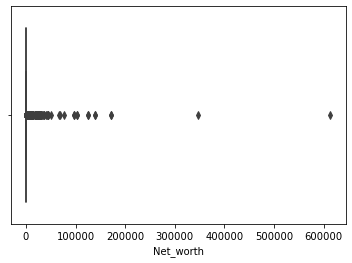

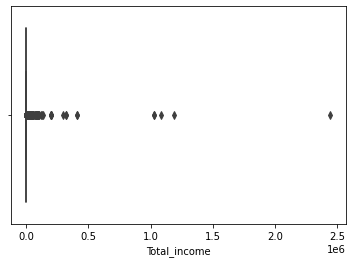

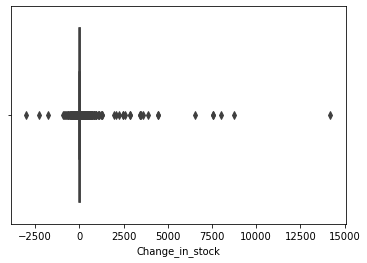

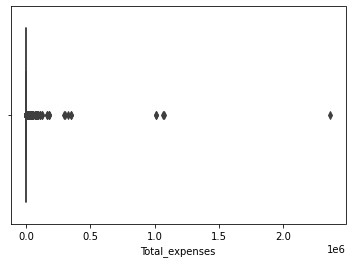

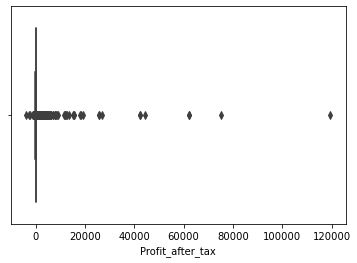

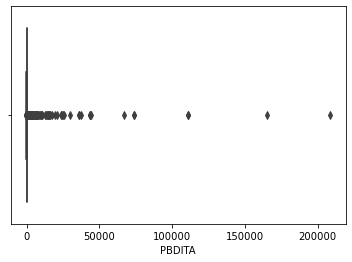

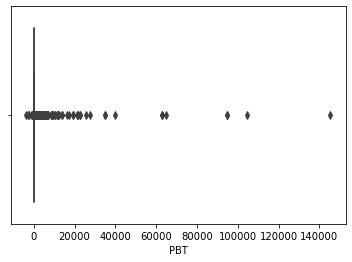

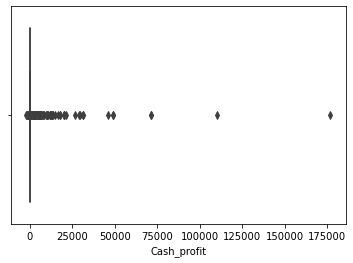

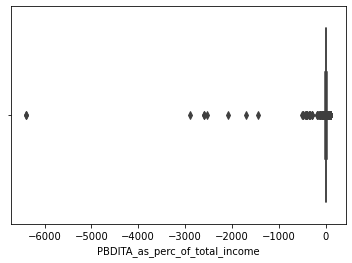

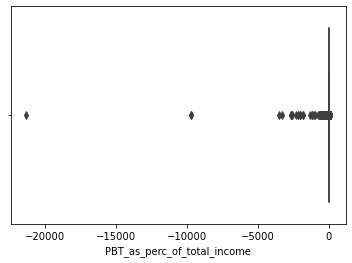

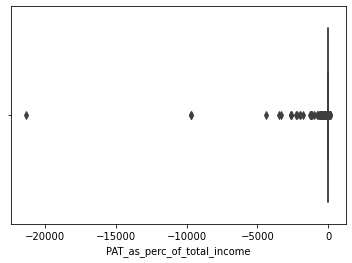

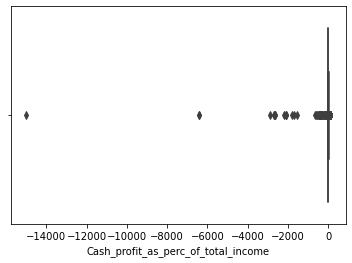

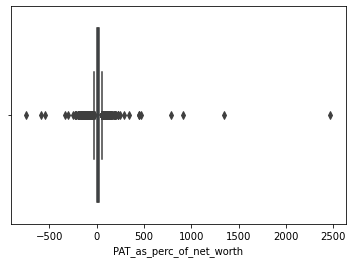

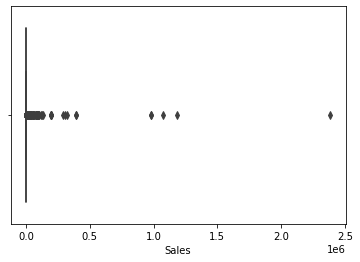

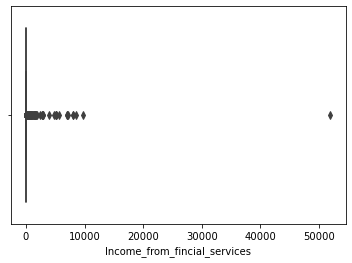

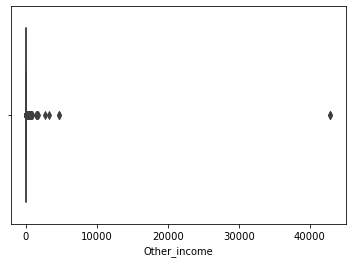

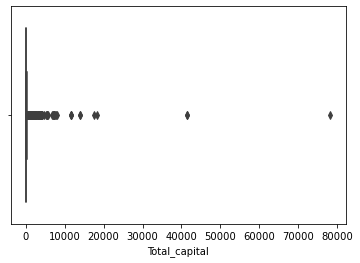

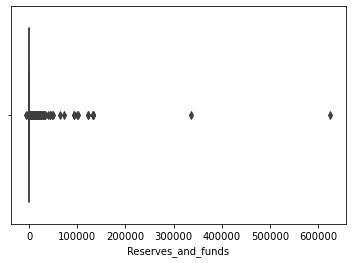

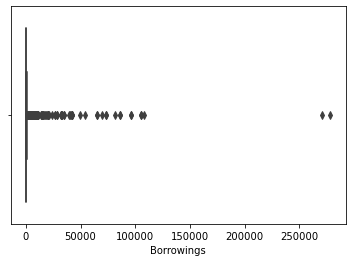

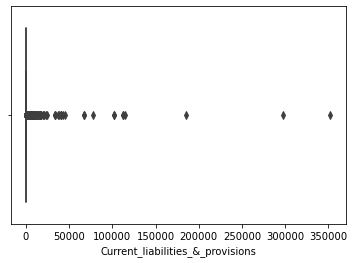

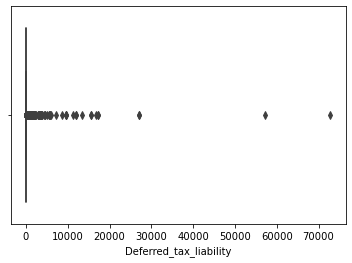

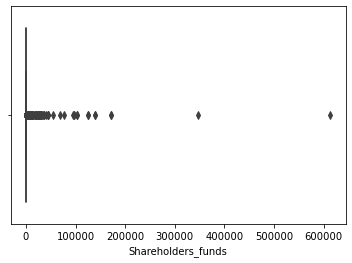

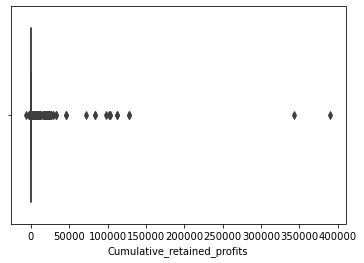

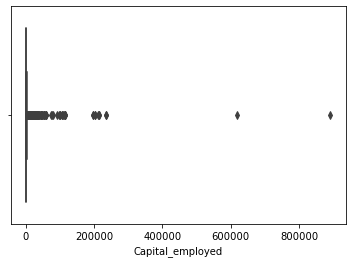

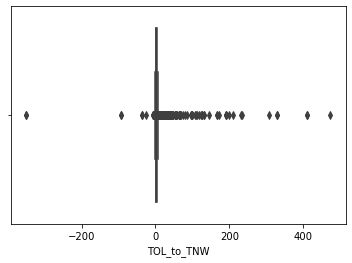

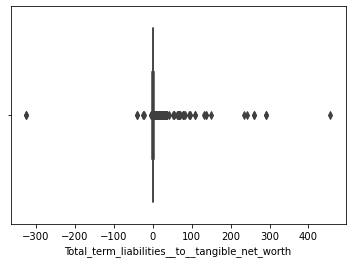

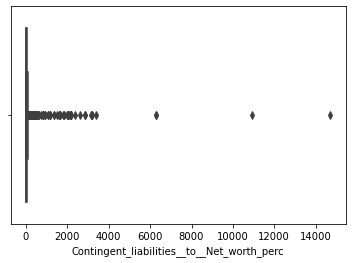

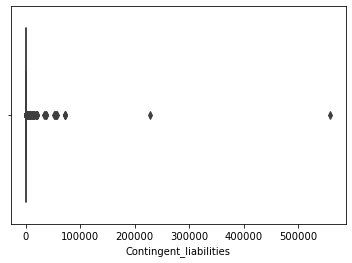

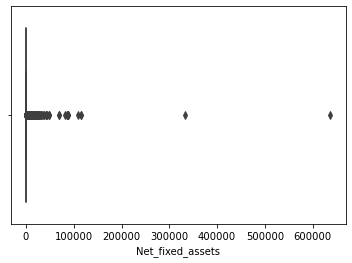

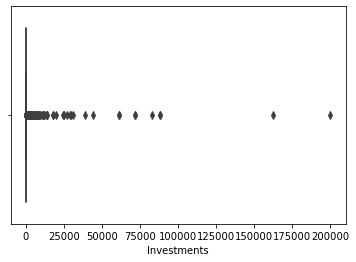

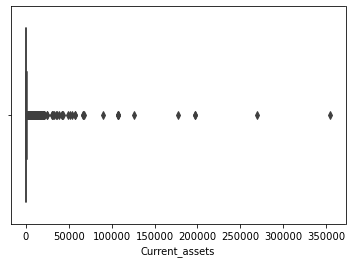

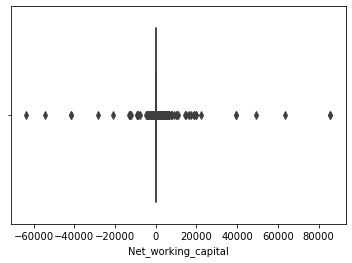

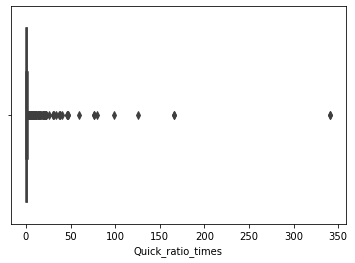

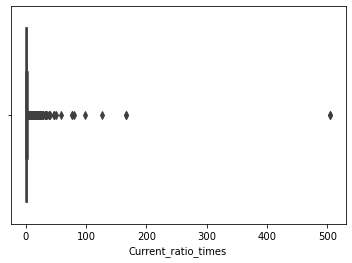

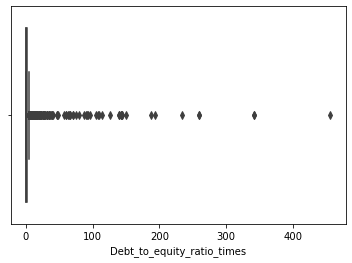

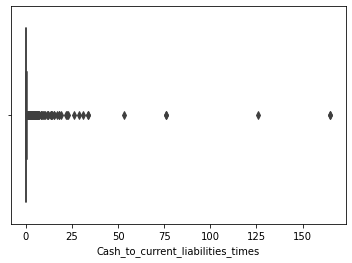

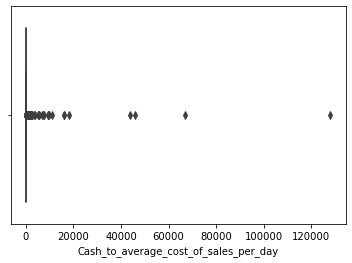

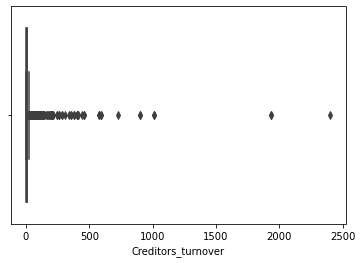

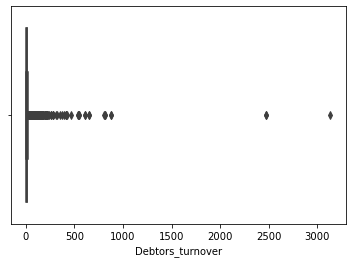

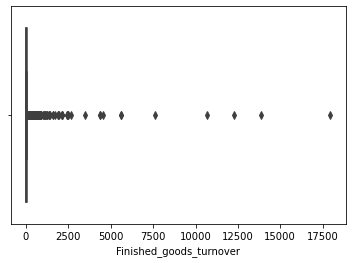

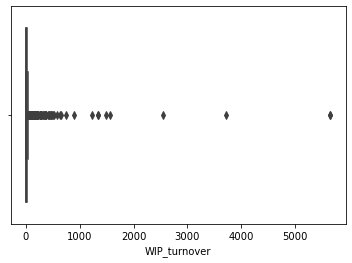

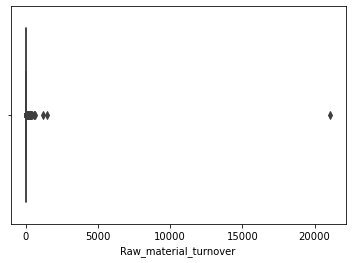

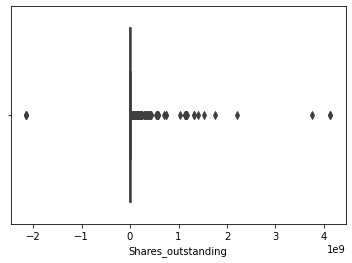

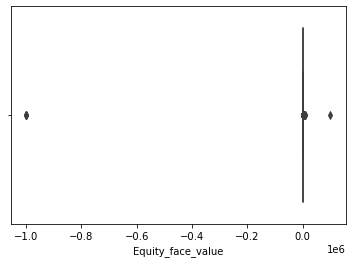

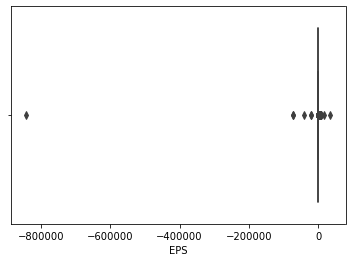

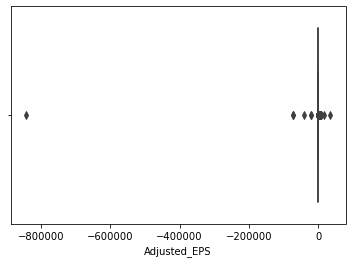

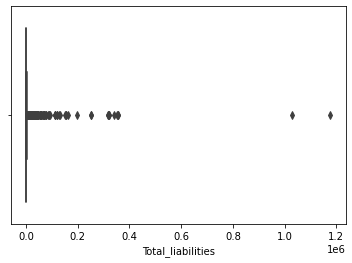

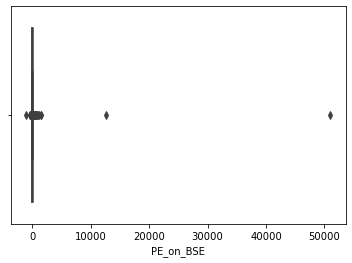

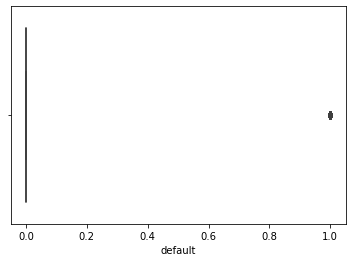

In [19]:
for cols in p1.columns:
    a.set_title(cols,fontsize=10)
    a = sns.boxplot(p1[cols] , orient='v')
    plt.show()

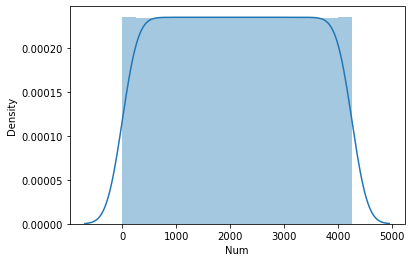

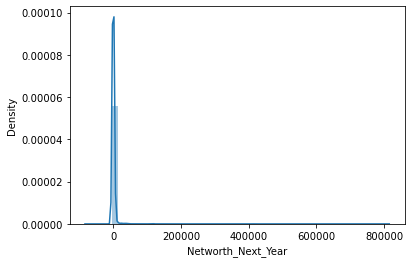

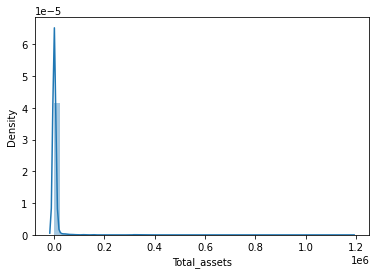

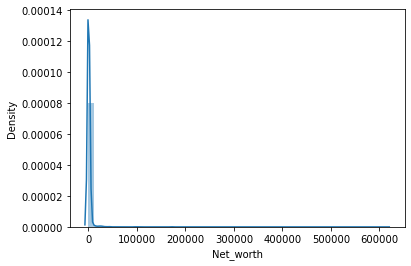

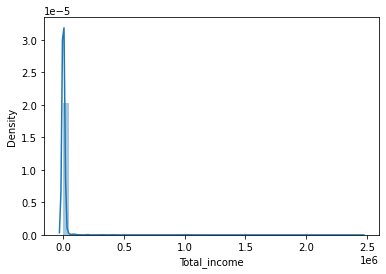

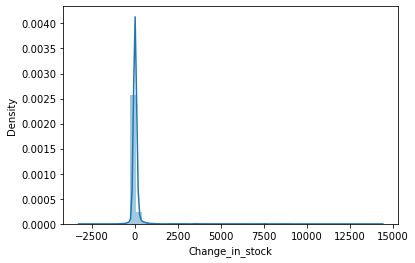

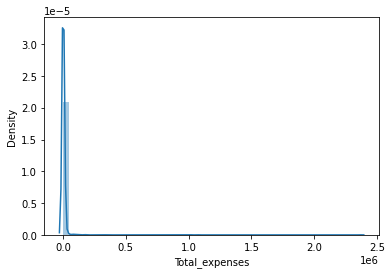

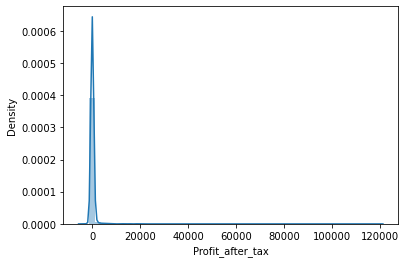

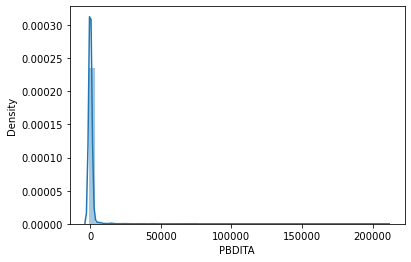

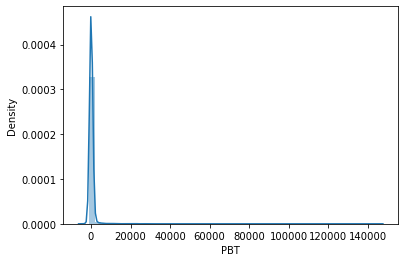

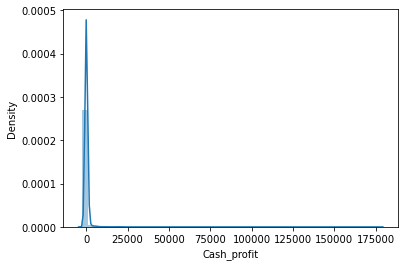

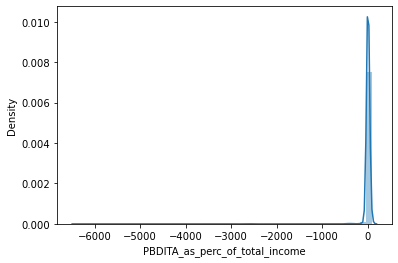

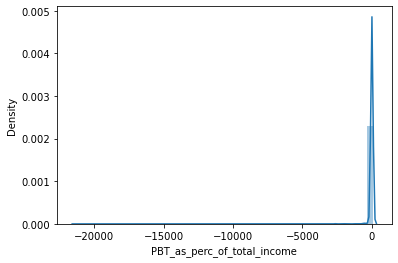

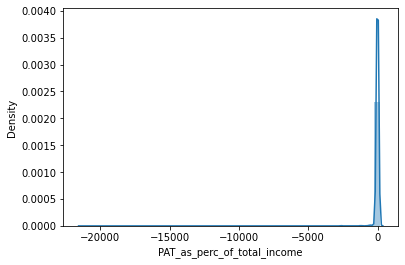

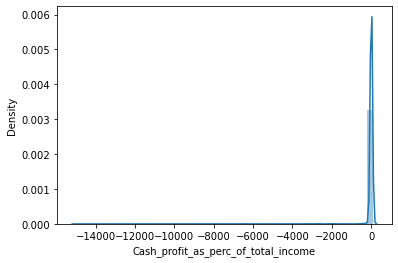

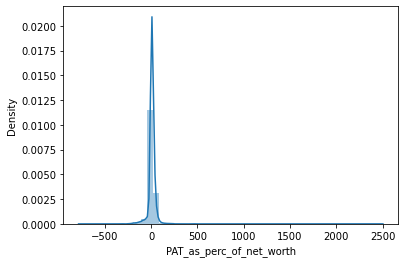

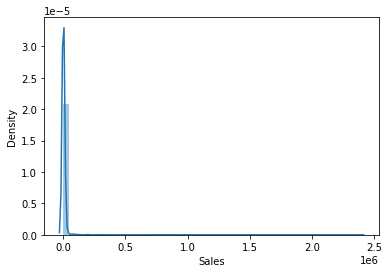

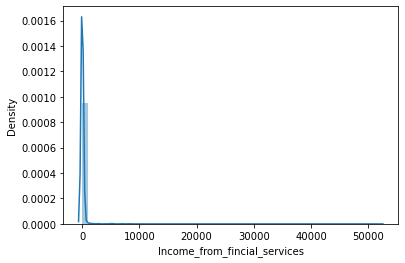

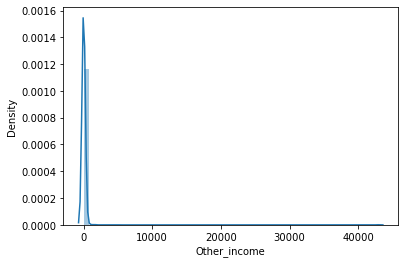

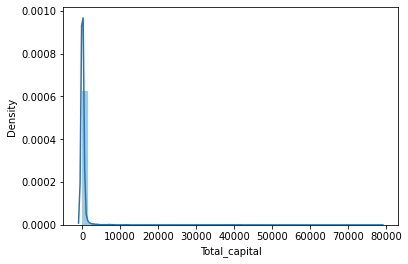

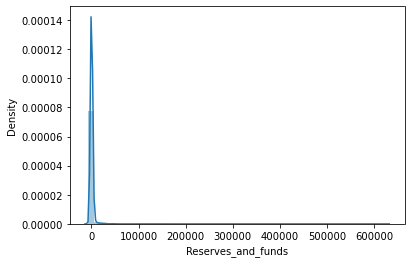

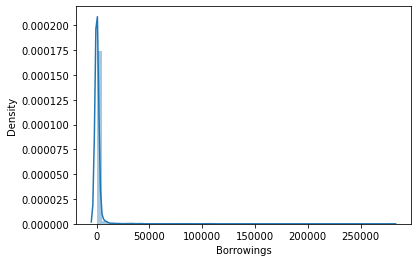

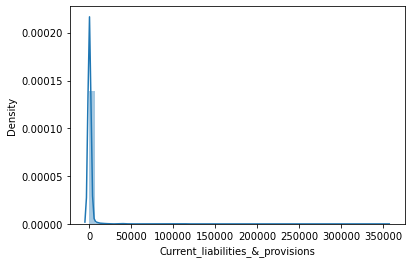

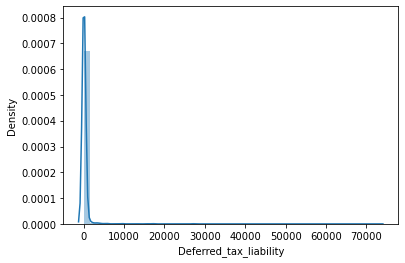

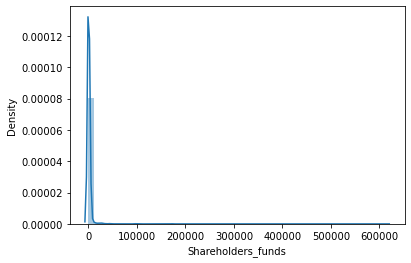

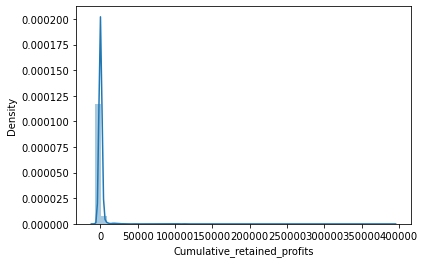

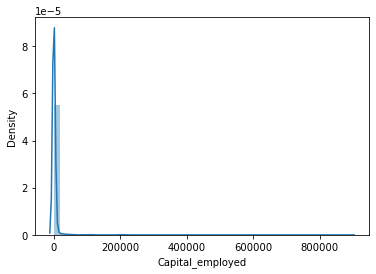

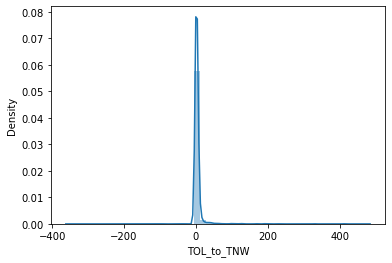

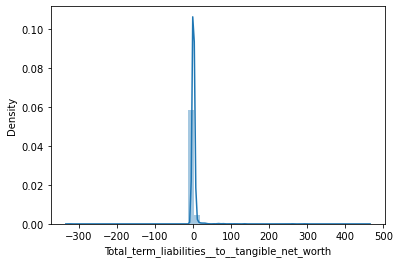

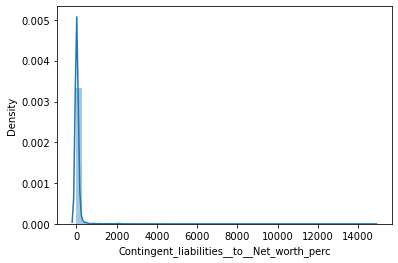

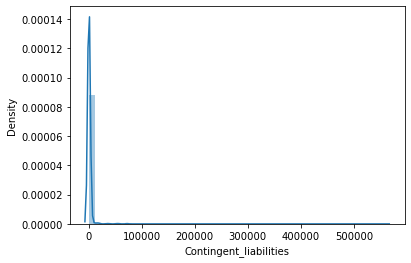

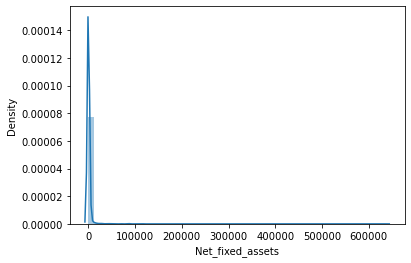

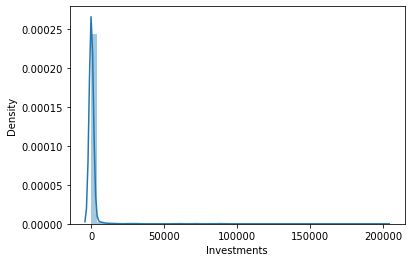

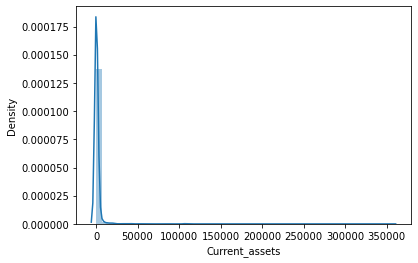

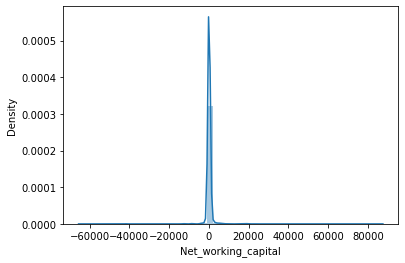

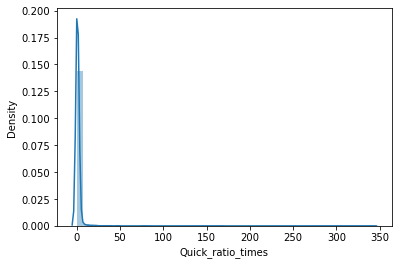

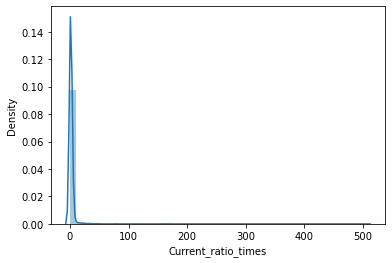

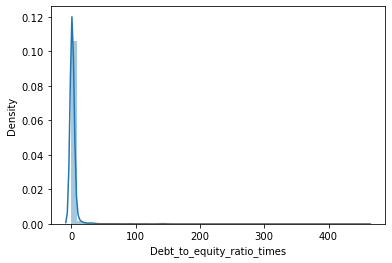

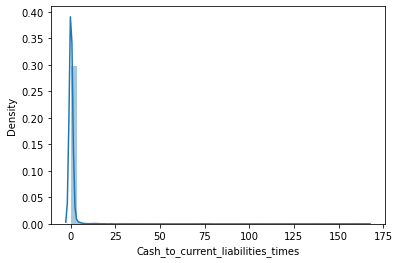

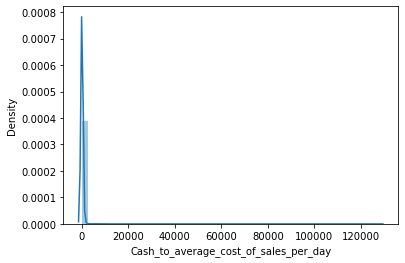

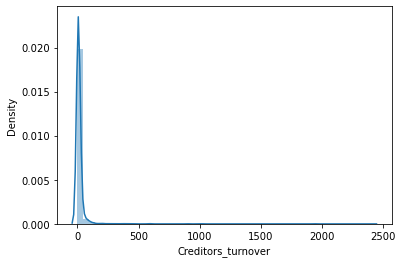

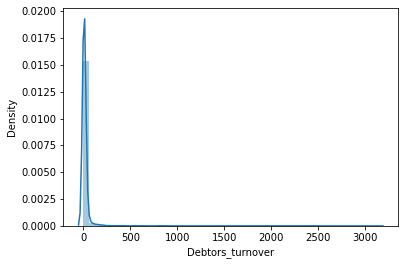

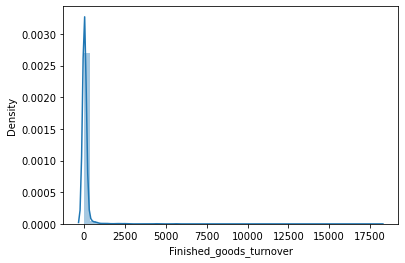

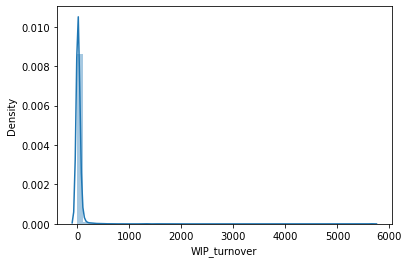

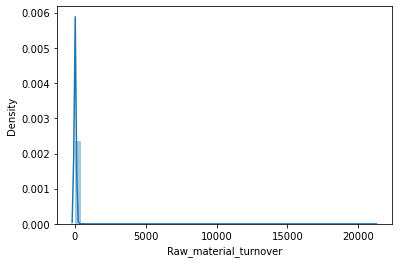

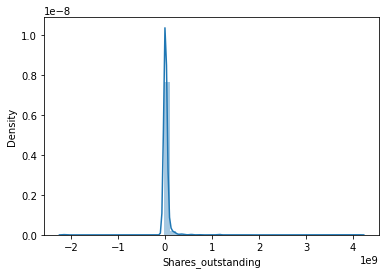

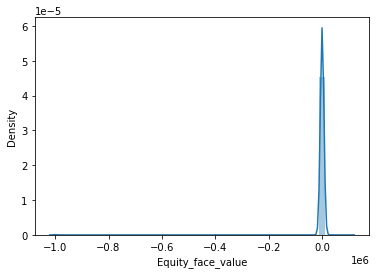

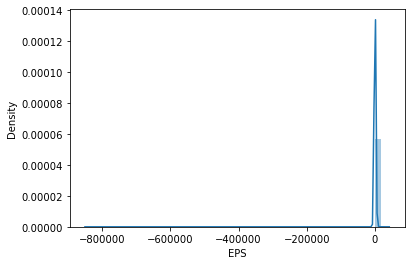

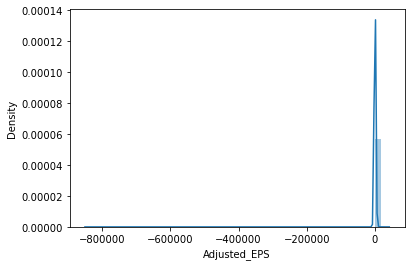

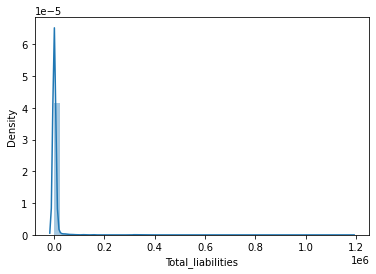

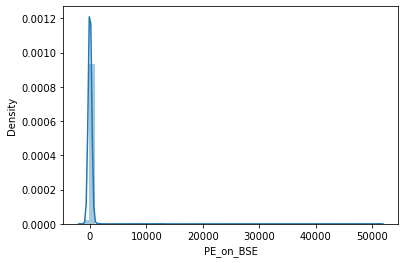

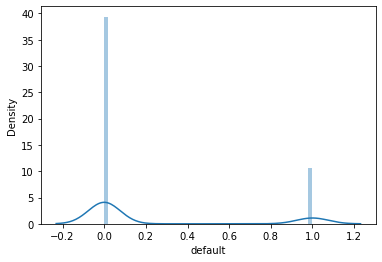

In [23]:
for cols in p1.columns:
    a.set_title(cols,fontsize=10)
    a = sns.distplot(p1[cols])
    plt.show()

In [10]:
p1.size

217056

In [11]:
Q1 = p1.quantile(0.25)
Q3 = p1.quantile(0.75)
IQR = Q3 - Q1
IQR = Q3 - Q1
outdf1=pd.DataFrame(((p1 < (Q1 - 1.5 * IQR)) | (p1 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))
outdf1["Lower outliers"]=pd.DataFrame(((p1 < (Q1 - 1.5 * IQR))).sum().sort_values(ascending=False))
outdf1["upper outliers"]=pd.DataFrame(((p1 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))
outdf1["Total"]=pd.DataFrame(((p1 < (Q1 - 1.5 * IQR)) | (p1 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False))
#outdf[outdf.iloc[:][0]!=0]
outdf1.drop(0,axis=1)

,Lower outliers,upper outliers,Total
Net_working_capital,242,564,806
Change_in_stock,246,504,750
Profit_after_tax,73,639,712
PBT,62,642,704
Cumulative_retained_profits,77,622,699
Adjusted_EPS,94,600,694
Reserves_and_funds,26,617,643
EPS,79,559,638
Cash_profit,35,592,627
Networth_Next_Year,14,610,624


In [12]:
(outdf1["Total"].sum()/p1.size)*100

11.95359722836503

In [16]:
Q1 = p1.quantile(0.05)
Q3 = p1.quantile(0.95)
IQR = Q3 - Q1
IQR = Q3 - Q1
outdf["total"]=pd.DataFrame(((p1 < (Q1-1.5 * IQR)) | (p1 > ( Q3+ 1.5 * IQR))).sum().sort_values(ascending=False))
outdf["Lower outliers"]=pd.DataFrame(((p1 < (Q1-1.5 * IQR))).sum().sort_values(ascending=False))
outdf["upper outliers"]=pd.DataFrame(((p1 > (Q3+1.5 * IQR))).sum().sort_values(ascending=False))
#outdf[outdf.iloc[:][0]!=0]
#outdf.drop(0,axis=1)
outdf

,0,Lower outliers,upper outliers,total
Adjusted_EPS,146,25,121,146
EPS,140,23,117,140
Net_working_capital,132,52,80,132
PAT_as_perc_of_total_income,105,92,13,105
Cash_to_average_cost_of_sales_per_day,102,0,102,102
TOL_to_TNW,98,7,91,98
Total_term_liabilities__to__tangible_net_worth,97,6,91,97
Cash_profit,91,3,88,91
Net_fixed_assets,91,0,91,91
PBT,91,3,88,91


In [17]:
(outdf["total"].sum()/p1.size)*100

1.9124097007223944

In [18]:
#We remove the outliers for all the columns by replacing the higher values with upper range and lower value with lower range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
for i in p1.columns:
    lr,ur=remove_outlier(p1[i])
    p1[i]=np.where(p1[i]>ur,ur,p1[i])
    p1[i]=np.where(p1[i]<lr,lr,p1[i])

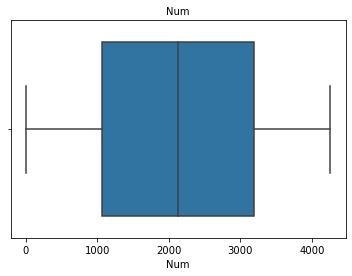

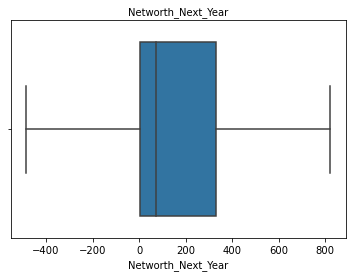

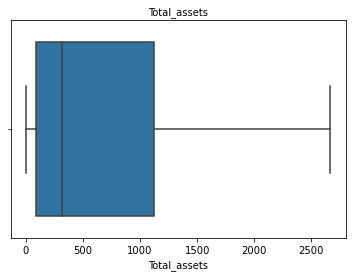

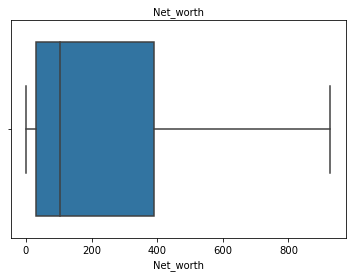

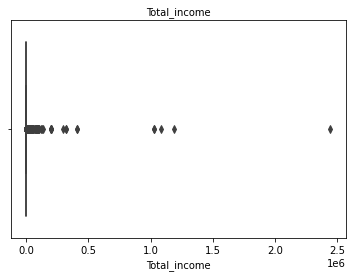

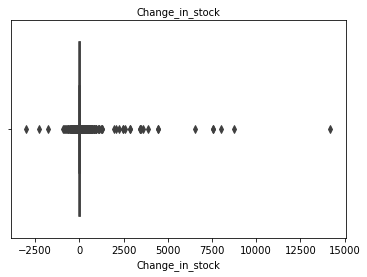

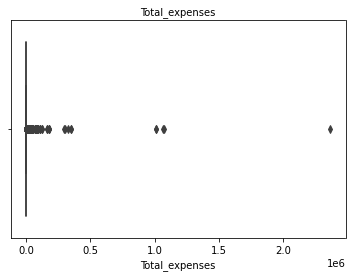

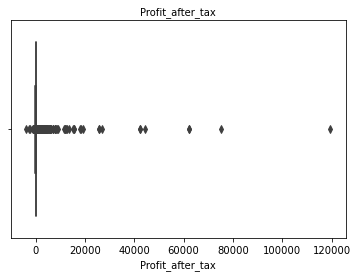

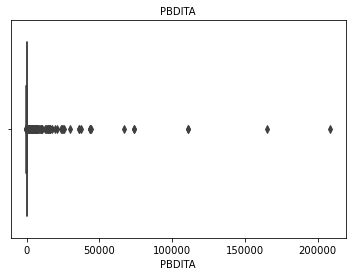

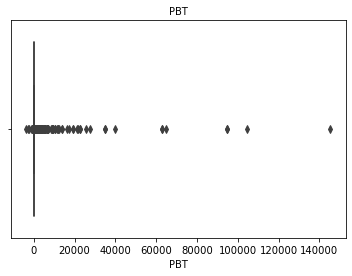

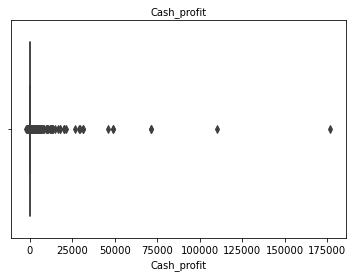

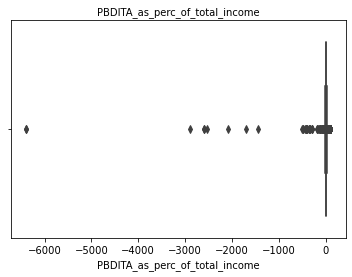

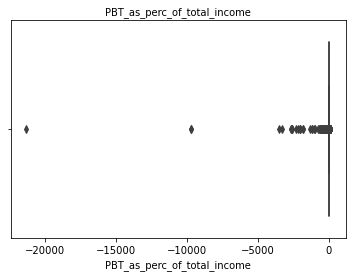

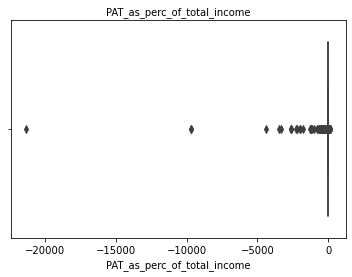

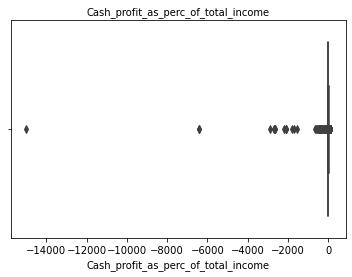

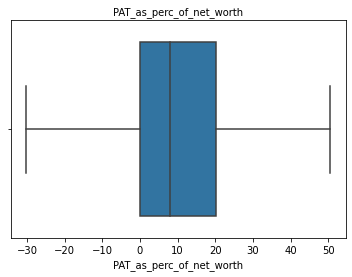

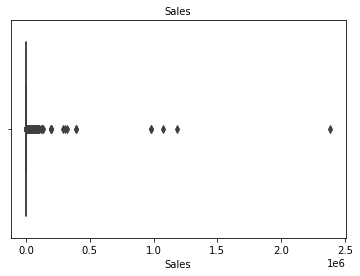

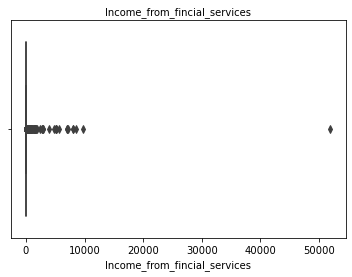

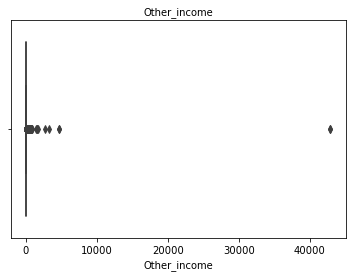

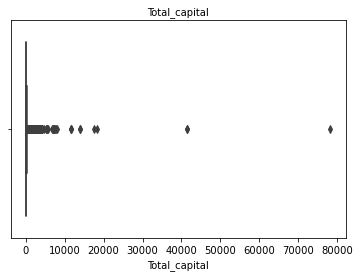

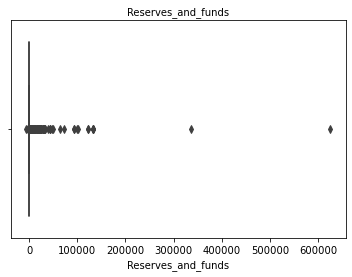

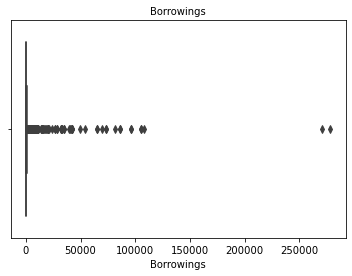

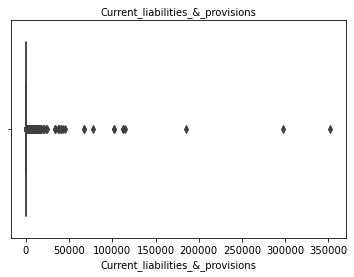

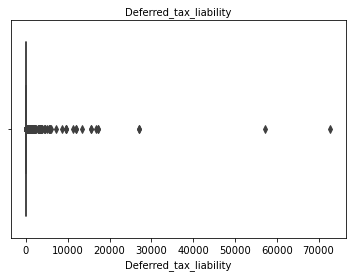

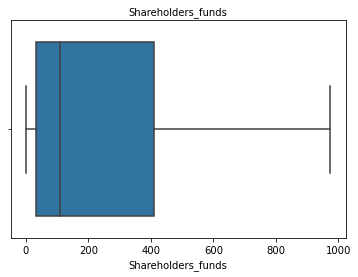

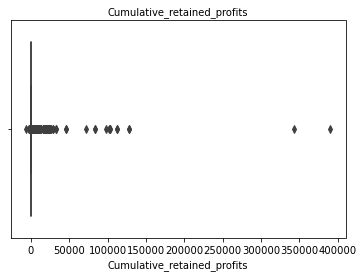

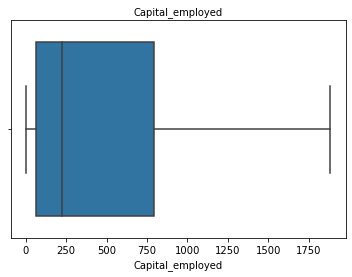

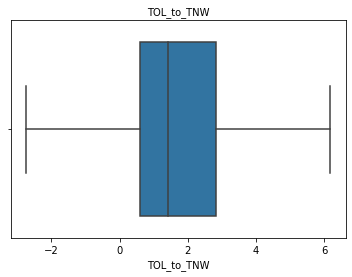

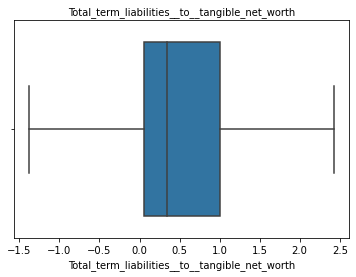

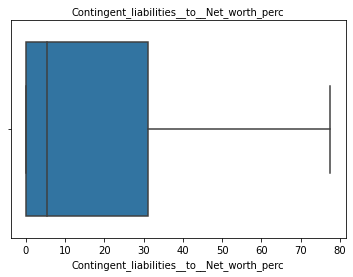

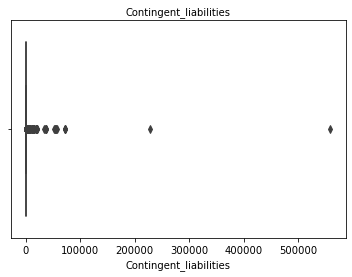

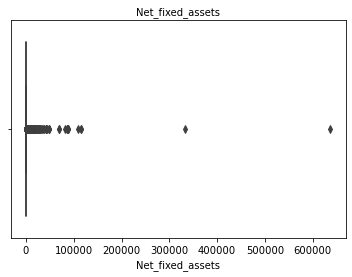

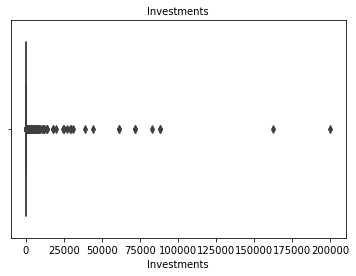

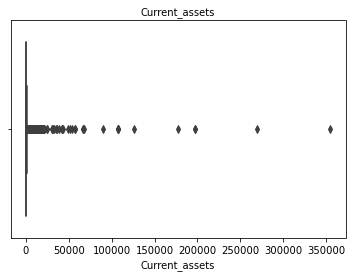

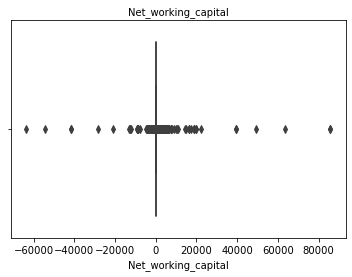

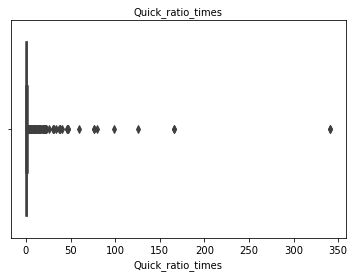

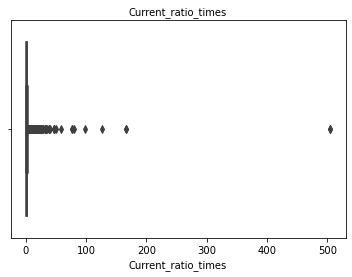

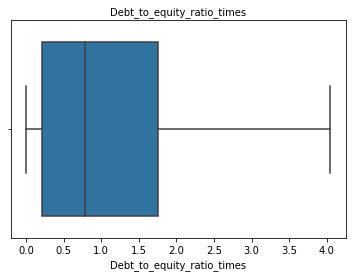

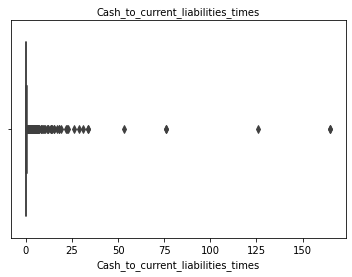

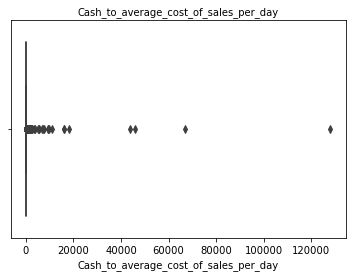

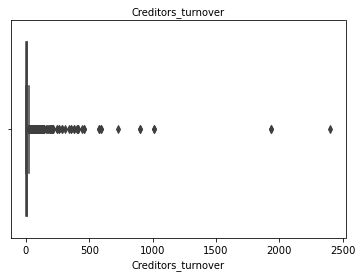

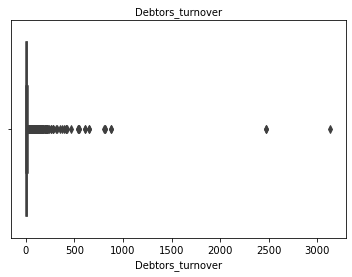

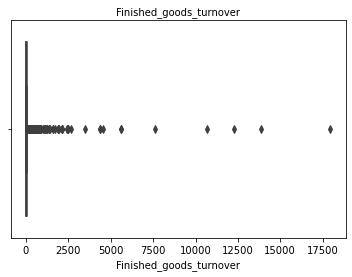

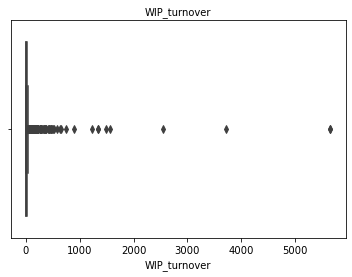

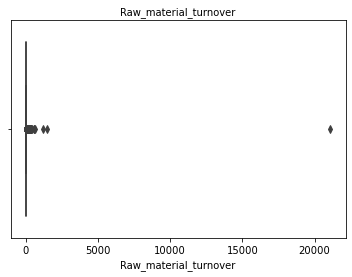

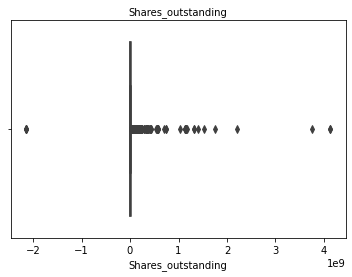

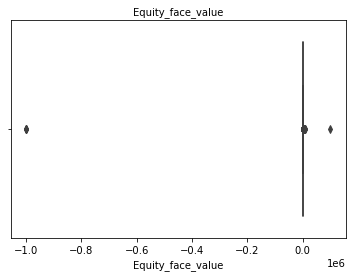

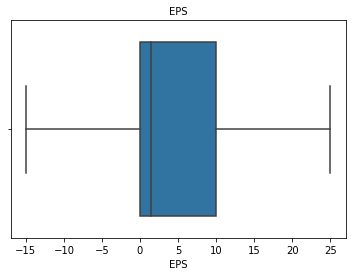

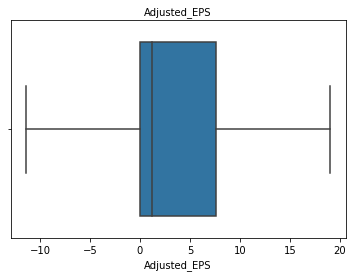

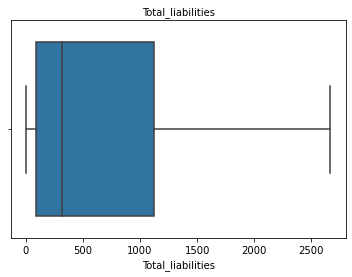

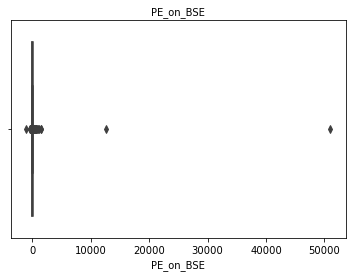

In [80]:
for cols in p1.columns:
    a =sns.boxplot(p1[cols] , orient='v')
    a.set_title(cols,fontsize=10)
    plt.show()

In [20]:
p1["Current_assets"].describe()

count      4176.000000
mean       1350.360010
std       10155.572745
min           0.100000
25%          36.600000
50%         148.350000
75%         515.000000
max      354815.200000
Name: Current_assets, dtype: float64

In [21]:
dups=p1.duplicated().sum()
print("There are ",dups, "duplicates in this dataset")

There are  0 duplicates in this dataset


In [22]:
p1.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,4256.000000,4256.000000,4256.000000,4256.000000,4.025000e+03,3706.000000,4.091000e+03,4102.000000,4102.000000,4102.000000,...,3871.000000,3382.000000,3492.000000,3828.000000,3.446000e+03,3446.000000,4256.000000,4256.000000,4256.000000,1629.000000
mean,2128.500000,220.460221,773.391835,265.931964,4.688190e+03,43.702482,4.356301e+03,295.050585,605.940639,410.259044,...,17.929029,84.369988,28.684513,17.733926,2.376491e+07,-1094.828671,5.767298,4.419341,773.391835,55.462290
std,1228.745702,298.594389,924.395819,323.850911,5.391895e+04,436.915048,5.139809e+04,3079.902071,5646.230633,4217.415307,...,90.164435,562.637359,169.650915,343.125864,1.709790e+08,34101.358644,9.704394,7.567579,924.395819,1304.445296
min,1.000000,-486.300000,0.100000,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.300000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-15.000000,-11.422500,0.100000,-1116.640000
25%,1064.750000,3.975000,91.300000,31.475000,1.071000e+02,-1.800000,9.680000e+01,0.500000,6.925000,0.800000,...,3.810000,8.190000,5.100000,3.020000,1.308382e+06,10.000000,0.000000,0.000000,91.300000,2.970000
50%,2128.500000,72.100000,315.500000,104.800000,4.551000e+02,1.600000,4.268000e+02,9.000000,36.900000,12.600000,...,6.470000,17.320000,9.860000,6.410000,4.750000e+06,10.000000,1.490000,1.240000,315.500000,8.690000
75%,3192.250000,330.825000,1120.800000,389.850000,1.485000e+03,18.400000,1.395700e+03,53.300000,158.700000,74.175000,...,11.850000,40.012500,20.240000,11.822500,1.090602e+07,10.000000,10.000000,7.615000,1120.800000,17.000000
max,4256.000000,821.100000,2665.050000,927.412500,2.442828e+06,14185.500000,2.366035e+06,119439.100000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,25.000000,19.037500,2665.050000,51002.740000


In [22]:
p1.isnull().sum().sort_values(ascending = False)

PE_on_BSE                                         2627
Investments                                       1715
Other_income                                      1556
Contingent_liabilities                            1402
Deferred_tax_liability                            1369
Income_from_fincial_services                      1111
Finished_goods_turnover                            874
Equity_face_value                                  810
Shares_outstanding                                 810
WIP_turnover                                       764
Change_in_stock                                    550
Borrowings                                         431
Raw_material_turnover                              428
Creditors_turnover                                 391
Debtors_turnover                                   385
Sales                                              305
Total_income                                       231
Total_expenses                                     165
PBDITA    

In [23]:
(p1.isnull().sum().sort_values(ascending = False)/p1.index.size)*100

PE_on_BSE                                         61.724624
Investments                                       40.296053
Other_income                                      36.560150
Contingent_liabilities                            32.941729
Deferred_tax_liability                            32.166353
Income_from_fincial_services                      26.104323
Finished_goods_turnover                           20.535714
Equity_face_value                                 19.031955
Shares_outstanding                                19.031955
WIP_turnover                                      17.951128
Change_in_stock                                   12.922932
Borrowings                                        10.126880
Raw_material_turnover                             10.056391
Creditors_turnover                                 9.187030
Debtors_turnover                                   9.046053
Sales                                              7.166353
Total_income                            

We can drop the columns that have more than 30% of missing values. However we need to understand the variable importance before doing do

In [23]:
p1.drop('PE_on_BSE',axis=1,inplace=True)

In [24]:
p1.drop('Investments',axis=1,inplace=True)

In [25]:
p1["default"]=np.where((p1["Networth_Next_Year"]>0), 0 ,1)

In [26]:
p1["default"].value_counts(normalize=True)

0    0.787594
1    0.212406
Name: default, dtype: float64

In [27]:
imputer = KNNImputer(n_neighbors=10)

In [28]:
p2= pd.DataFrame(imputer.fit_transform(p1), columns = p1.columns)

In [21]:
p2.isnull().sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capita

<AxesSubplot:xlabel='default', ylabel='Networth_Next_Year'>

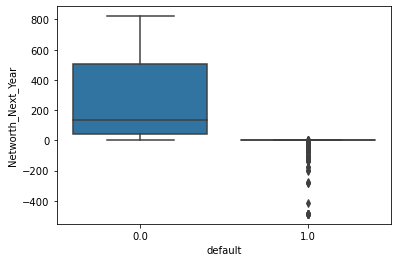

In [29]:
sns.boxplot(x=p2['default'] , y=p2["Networth_Next_Year"])

<AxesSubplot:xlabel='default', ylabel='Net_worth'>

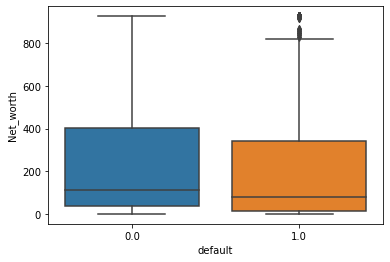

In [30]:
sns.boxplot(x=p2['default'] , y=p2["Net_worth"])

<AxesSubplot:xlabel='default', ylabel='Total_income'>

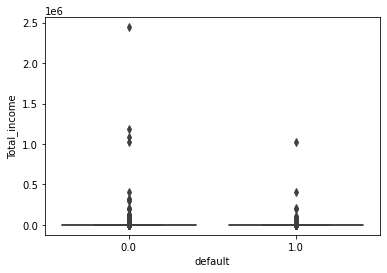

In [31]:
sns.boxplot(x=p2['default'] , y=p2["Total_income"])

<AxesSubplot:xlabel='default', ylabel='Total_expenses'>

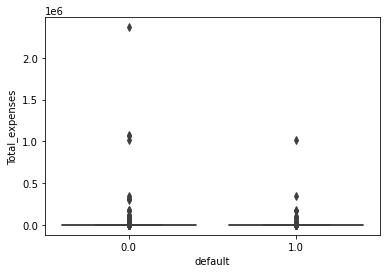

In [32]:
sns.boxplot(x=p2['default'] , y=p2["Total_expenses"])

<AxesSubplot:xlabel='default', ylabel='Debt_to_equity_ratio_times'>

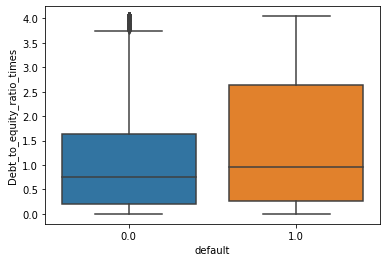

In [33]:
sns.boxplot(x=p2['default'] , y=p2["Debt_to_equity_ratio_times"])

<AxesSubplot:xlabel='default', ylabel='PBT_as_perc_of_total_income'>

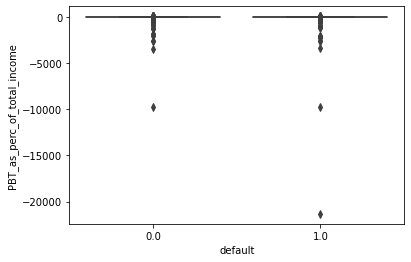

In [34]:
sns.boxplot(x=p2['default'] , y=p2["PBT_as_perc_of_total_income"])

<AxesSubplot:xlabel='default', ylabel='PAT_as_perc_of_net_worth'>

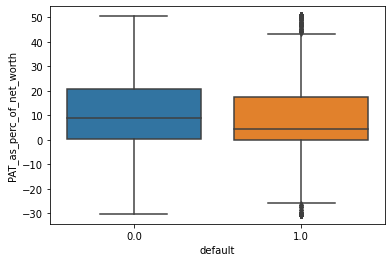

In [35]:
sns.boxplot(x=p2['default'] , y=p2["PAT_as_perc_of_net_worth"])

<AxesSubplot:xlabel='default', ylabel='Equity_face_value'>

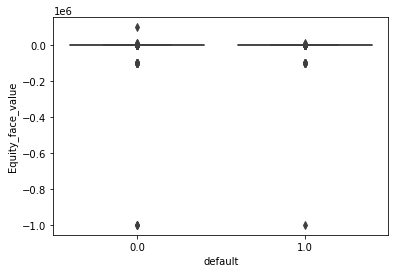

In [84]:
sns.boxplot(x=p2['default'] , y=p2["Equity_face_value"])

<AxesSubplot:xlabel='default', ylabel='Cash_to_current_liabilities_times'>

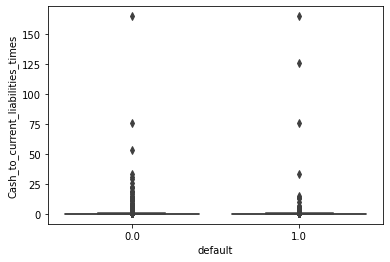

In [85]:
sns.boxplot(x=p2['default'] , y=p2["Cash_to_current_liabilities_times"])

<AxesSubplot:xlabel='default', ylabel='Other_income'>

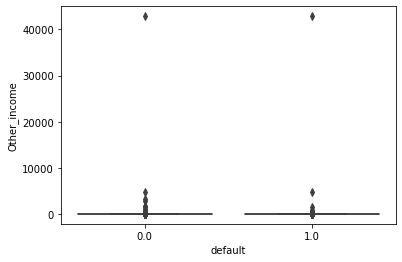

In [86]:
sns.boxplot(x=p2['default'] , y=p2["Other_income"])

<AxesSubplot:xlabel='default', ylabel='Income_from_fincial_services'>

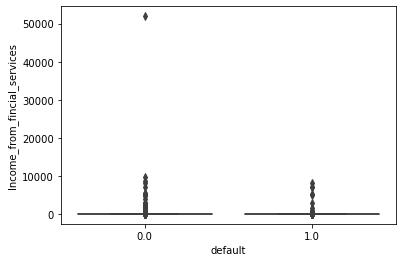

In [87]:
sns.boxplot(x=p2['default'] , y=p2["Income_from_fincial_services"])

<AxesSubplot:xlabel='default', ylabel='Debt_to_equity_ratio_times'>

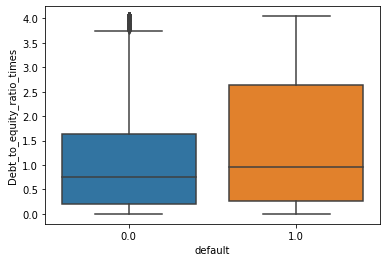

In [88]:
sns.boxplot(x=p2['default'] , y=p2["Debt_to_equity_ratio_times"])

<AxesSubplot:xlabel='default', ylabel='Contingent_liabilities__to__Net_worth_perc'>

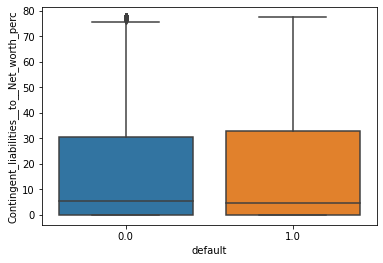

In [89]:
sns.boxplot(x=p2['default'] , y=p2["Contingent_liabilities__to__Net_worth_perc"])

<AxesSubplot:xlabel='default', ylabel='Borrowings'>

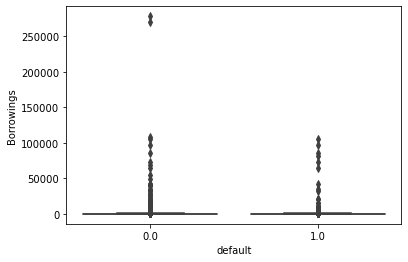

In [177]:
sns.boxplot(x=p2['default'] , y=p2["Borrowings"])

<AxesSubplot:xlabel='default', ylabel='Current_assets'>

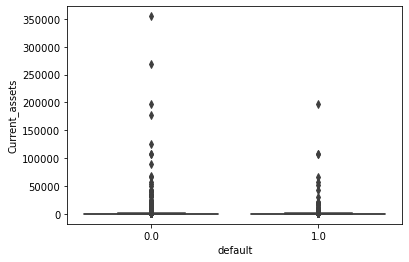

In [178]:
sns.boxplot(x=p2['default'] , y=p2["Current_assets"])

<AxesSubplot:xlabel='default', ylabel='Total_liabilities'>

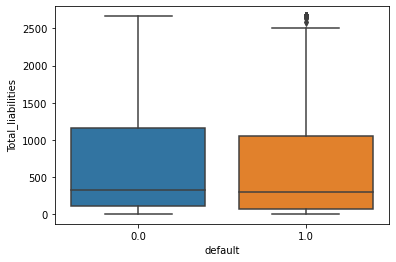

In [179]:
sns.boxplot(x=p2['default'] , y=p2["Total_liabilities"])

In [92]:
p2.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,1.0,395.3,827.60,336.5000,534.1,13.5,508.7,38.9,124.4,64.6,...,5.650,3.990,3.370,14.870,8760056.0,10.0,4.44,4.44,827.60,0.0
1,2.0,36.2,67.70,24.3000,137.9,-3.7,131.0,3.2,5.5,1.0,...,4.572,23.858,11.405,10.395,1653128.0,27.4,0.00,0.00,67.70,0.0
2,3.0,84.0,238.40,78.9000,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.510,17.670,8.760,8.350,3312777.4,19.0,0.00,0.00,238.40,0.0
3,4.0,821.1,2665.05,927.4125,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.910,18.140,18.620,11.110,10000000.0,10.0,17.60,17.60,2665.05,0.0
4,5.0,41.8,90.90,47.0000,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.000,45.870,28.670,19.930,107315.0,100.0,-6.52,-6.52,90.90,0.0


In [21]:
# columns missing value is replaced with that columns median
for column in p1.columns:
  p1[column] = p1[column].fillna(p1[column].median())

In [27]:
p1.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,1.0,395.3,827.60,336.5000,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.60,0.0
1,2.0,36.2,67.70,24.3000,137.9,-3.7,131.0,3.2,5.5,1.0,...,6.47,17.32,9.86,6.41,4750000.0,10.0,0.00,0.00,67.70,0.0
2,3.0,84.0,238.40,78.9000,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,4750000.0,10.0,0.00,0.00,238.40,0.0
3,4.0,821.1,2665.05,927.4125,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,2665.05,0.0
4,5.0,41.8,90.90,47.0000,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.90,0.0


In [28]:
p1.isnull().sum()

Num                                               0
Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capita

<AxesSubplot:>

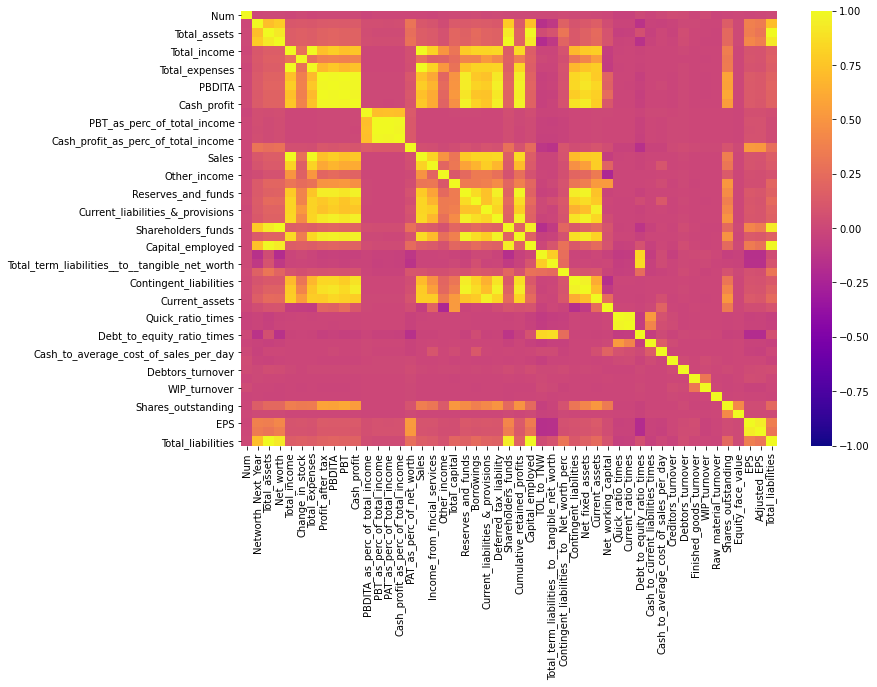

In [49]:
plt.figure(figsize = (12,8))
cor_matrix = p1.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [22]:
p2.default.value_counts()

0.0    3352
1.0     904
Name: default, dtype: int64

# Standardization of data

In [36]:
predictors = p2.drop('default', axis = 1)
response = p2['default']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [145]:
scaled_predictors

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,-1.731644,0.585612,0.058649,0.217928,-0.074511,-0.060787,-0.073128,-0.081238,-0.083024,-0.079955,...,-0.069810,-0.136909,-0.150684,-0.167524,-0.018557,-0.064131,0.049565,-0.136789,0.002730,0.058649
1,-1.730830,-0.617165,-0.763498,-0.746209,-0.082067,-0.102953,-0.080623,-0.093044,-0.104473,-0.095315,...,-0.157711,-0.149420,-0.111171,-0.115692,-0.031797,-0.109909,0.050113,-0.594367,-0.584052,-0.763498
2,-1.730016,-0.457062,-0.578816,-0.577593,-0.078381,-0.138255,-0.077087,-0.092813,-0.100811,-0.093021,...,-0.199071,-0.173353,-0.123478,-0.132754,-0.037847,-0.099219,0.049848,-0.594367,-0.584052,-0.578816
3,-1.729202,2.011794,2.046613,2.042786,0.076414,0.426329,0.085104,-0.035137,-0.029990,-0.050853,...,-0.181947,-0.180316,-0.122543,-0.069149,-0.029681,-0.056144,0.049565,1.219457,1.741932,2.046613
4,-1.728388,-0.598408,-0.738398,-0.676106,-0.077286,-0.085547,-0.075430,-0.094334,-0.104166,-0.095702,...,0.069255,0.586742,-0.067394,-0.004319,-0.003587,-0.119866,0.052400,-1.266307,-1.445723,-0.738398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,1.728388,-0.737744,-0.836311,-0.820634,-0.084046,-0.087656,-0.082522,-0.094152,-0.105178,-0.095538,...,-0.230006,-0.202484,-0.110091,-0.036747,-0.062550,-0.116597,0.053250,-0.594367,-0.584052,-0.836311
4252,1.729202,-0.425913,-0.664070,-0.553505,-0.081399,-0.093637,-0.079855,-0.093011,-0.102146,-0.094663,...,-0.162889,-0.181593,-0.136743,-0.135850,-0.033320,-0.067979,0.049565,-0.551083,-0.528546,-0.664070
4253,1.730016,2.011794,0.065356,1.231168,-0.040556,-0.015189,-0.040526,-0.029548,-0.042617,-0.022379,...,0.161782,-0.131918,-0.040725,0.011614,-0.033350,-0.072378,0.049565,1.982088,1.931909,0.065356
4254,1.730830,-0.522041,-0.733962,-0.671474,-0.082589,-0.082606,-0.080971,-0.093573,-0.103715,-0.094929,...,-0.145489,-0.159425,-0.001526,-0.115014,-0.018320,-0.100078,0.049820,-0.594367,-0.584052,-0.733962


In [146]:
response

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4251    0.0
4252    0.0
4253    0.0
4254    0.0
4255    1.0
Name: default, Length: 4256, dtype: float64

In [39]:
response.value_counts()

0.0    3352
1.0     904
Name: default, dtype: int64

In [99]:
p3 = pd.concat([scaled_predictors, response], axis = 1)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Splitting train and test data

In [41]:
X_train,X_test, y_train, y_test = train_test_split(scaled_predictors, response, 
                                                    test_size = 0.3, random_state =22)

In [42]:
X_train.shape

(2979, 49)

In [43]:
X_test.shape

(1277, 49)

In [44]:
y_test.value_counts()

0.0    1006
1.0     271
Name: default, dtype: int64

# Random Forest without SMOTE

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
#X_train.drop("Networth_Next_Year",axis=1,inplace=True)
#X_test.drop("Networth_Next_Year",axis=1,inplace=True)

In [150]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=7)
rfcl = rfcl.fit(X_train, y_train)

In [151]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [152]:
confusion_matrix(y_train, ytrain_predict)

array([[2346,    0],
       [   0,  633]], dtype=int64)

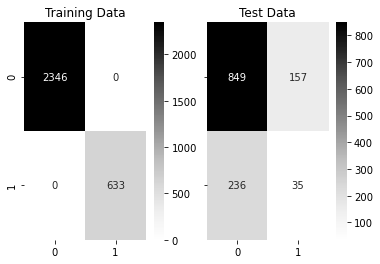

In [153]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [154]:
ytrain_predict_prob=rfcl.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.79,0.21
1,0.94,0.06
2,0.92,0.08
3,0.28,0.72
4,0.77,0.23


In [155]:
ytest_predict_prob=rfcl.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.75,0.25
1,0.83,0.17
2,0.32,0.68
3,0.69,0.31
4,0.90,0.10


AUC: 1.000


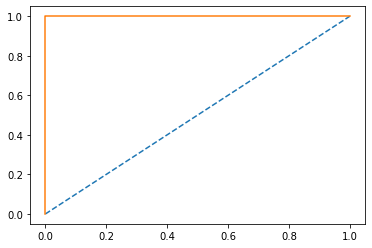

In [53]:
# predict probabilities for outlier treated dataset
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


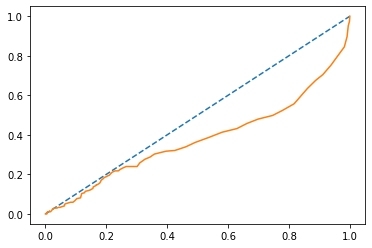

In [54]:
# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [55]:
# Variable Importance
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                     Imp
Num                                             0.121554
Other_income                                    0.031805
Contingent_liabilities                          0.029154
Deferred_tax_liability                          0.028996
Shares_outstanding                              0.025660
Finished_goods_turnover                         0.025149
Income_from_fincial_services                    0.025087
Creditors_turnover                              0.023359
WIP_turnover                                    0.022439
PAT_as_perc_of_net_worth                        0.022143
Reserves_and_funds                              0.021604
PAT_as_perc_of_total_income                     0.020705
Debtors_turnover                                0.020495
Borrowings                                      0.020393
Cumulative_retained_profits                     0.020252
Change_in_stock                                 0.020213
Current_ratio_times            

In [157]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2346
         1.0       1.00      1.00      1.00       633

    accuracy                           1.00      2979
   macro avg       1.00      1.00      1.00      2979
weighted avg       1.00      1.00      1.00      2979



In [156]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81      1006
         1.0       0.18      0.13      0.15       271

    accuracy                           0.69      1277
   macro avg       0.48      0.49      0.48      1277
weighted avg       0.66      0.69      0.67      1277



# Hyper parameter tuning with Random Forest without SMOTE

In [158]:
param_grid = {
    'max_features': [10,15],
    'min_samples_leaf': [40,50],
    'n_estimators': [50,100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [159]:
X_train.shape

(2979, 48)

In [160]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_features': 15, 'min_samples_leaf': 40, 'n_estimators': 50}


RandomForestClassifier(max_features=15, min_samples_leaf=40, n_estimators=50)

In [161]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [162]:
confusion_matrix(y_train, ytrain_predict)

array([[2312,   34],
       [ 557,   76]], dtype=int64)

In [163]:
#Train Data Accuracy
rf_test_acc=best_grid.score(X_test,y_test) 
rf_test_acc

0.8018794048551292

In [164]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      2346
         1.0       0.69      0.12      0.20       633

    accuracy                           0.80      2979
   macro avg       0.75      0.55      0.55      2979
weighted avg       0.78      0.80      0.74      2979



In [165]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      1006
         1.0       0.69      0.12      0.21       271

    accuracy                           0.80      1277
   macro avg       0.75      0.55      0.55      1277
weighted avg       0.78      0.80      0.74      1277



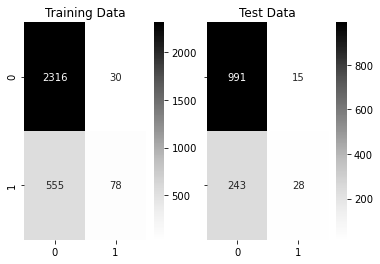

In [63]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [64]:
ytrain_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.709534,0.290466
1,0.825049,0.174951
2,0.839692,0.160308
3,0.765259,0.234741
4,0.770372,0.229628


In [65]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.803684,0.196316
1,0.763586,0.236414
2,0.596524,0.403476
3,0.773407,0.226593
4,0.868003,0.131997


AUC: 0.818


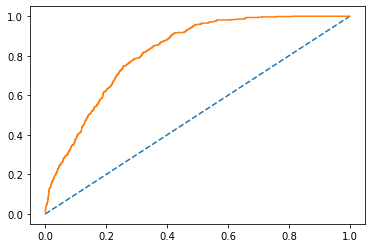

In [66]:
# predict probabilities for outlier treated dataset
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.818


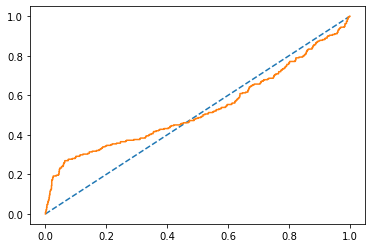

In [67]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [68]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                     Imp
PAT_as_perc_of_net_worth                        0.093558
Debt_to_equity_ratio_times                      0.056205
Cash_profit                                     0.044827
Profit_after_tax                                0.042535
Shareholders_funds                              0.039636
TOL_to_TNW                                      0.033716
Cumulative_retained_profits                     0.033249
PBT_as_perc_of_total_income                     0.031466
Reserves_and_funds                              0.030044
Net_worth                                       0.027922
Creditors_turnover                              0.024996
EPS                                             0.024305
Adjusted_EPS                                    0.023771
Quick_ratio_times                               0.022504
PBT                                             0.021321
Contingent_liabilities                          0.020781
WIP_turnover                   

# Random Forest with SMOTE

In [166]:
from imblearn.over_sampling import SMOTE 

In [167]:
X_train.shape

(2979, 48)

In [168]:
sm = SMOTE(random_state=22)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [169]:
param_grid = {
    'max_features': [10,12],
    'min_samples_leaf': [20,25],
    'n_estimators': [30,45]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [170]:
grid_search.fit(X_res, y_res)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_features': 10, 'min_samples_leaf': 20, 'n_estimators': 45}


RandomForestClassifier(max_features=10, min_samples_leaf=20, n_estimators=45)

In [171]:
ytrain_predict = best_grid.predict(X_res)
ytest_predict = best_grid.predict(X_test)

In [172]:
confusion_matrix(y_res, ytrain_predict)

array([[2083,  263],
       [ 367, 1979]], dtype=int64)

In [174]:
print(classification_report(y_res, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      2346
         1.0       0.88      0.84      0.86      2346

    accuracy                           0.87      4692
   macro avg       0.87      0.87      0.87      4692
weighted avg       0.87      0.87      0.87      4692



In [175]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      1006
         1.0       0.24      0.27      0.25       271

    accuracy                           0.66      1277
   macro avg       0.52      0.52      0.52      1277
weighted avg       0.68      0.66      0.67      1277



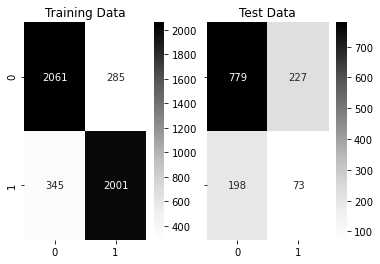

In [78]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_res,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [79]:
ytrain_predict_prob=best_grid.predict_proba(X_res)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.550674,0.449326
1,0.690195,0.309805
2,0.609451,0.390549
3,0.717225,0.282775
4,0.472225,0.527775


In [80]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sort_values(by=0,axis=1,ascending=True)

,1,0
0,0.317794,0.682206
1,0.517203,0.482797
2,0.609640,0.390360
3,0.314302,0.685698
4,0.457552,0.542448
...,...,...
1272,0.727868,0.272132
1273,0.402065,0.597935
1274,0.567289,0.432711
1275,0.432182,0.567818


AUC: 0.939


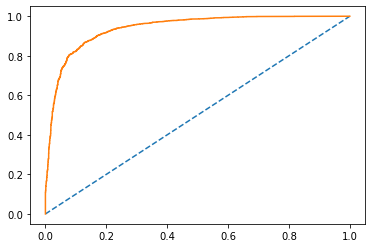

In [81]:
# predict probabilities for outlier treated dataset
probs = best_grid.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.939


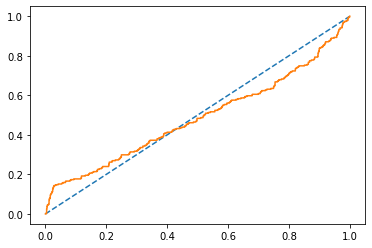

In [82]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [83]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_res.columns).sort_values('Imp',ascending=False))

                                                     Imp
Equity_face_value                               0.055999
Cash_to_current_liabilities_times               0.047700
Other_income                                    0.041145
Adjusted_EPS                                    0.037908
Income_from_fincial_services                    0.037615
Total_term_liabilities__to__tangible_net_worth  0.037029
Debt_to_equity_ratio_times                      0.032729
Contingent_liabilities__to__Net_worth_perc      0.031975
PAT_as_perc_of_total_income                     0.029581
TOL_to_TNW                                      0.028833
PBT_as_perc_of_total_income                     0.028262
Cash_to_average_cost_of_sales_per_day           0.027194
EPS                                             0.026221
PBT                                             0.025882
WIP_turnover                                    0.025366
Cash_profit_as_perc_of_total_income             0.024131
Finished_goods_turnover        

# Logistic Regression without SMOTE

In [90]:
# Split X and y into training and test set in 70:30 ratio for outlier treated dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_predictors,response, test_size=0.30 , random_state=22)

In [97]:
X_train.drop("Networth_Next_Year",axis=1,inplace=True)
X_test.drop("Networth_Next_Year",axis=1,inplace=True)

In [98]:
LogR = LogisticRegression()

In [99]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [100]:
selector = selector.fit(X_train, y_train)

In [101]:
selector.n_features_

15

In [102]:
selector.ranking_

array([33, 21, 12, 16, 29, 22, 19,  1,  1,  1, 11,  1,  1,  1,  1,  2,  7,
        4,  9, 18, 20,  1,  1, 30,  5, 13,  6, 28, 34,  8,  1,  3,  1, 24,
       25, 15, 26, 17, 23, 27, 32,  1,  1, 10, 31,  1,  1, 14])

In [106]:
df = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
7,PBDITA,1
8,PBT,1
9,Cash_profit,1
11,PBT_as_perc_of_total_income,1
12,PAT_as_perc_of_total_income,1
13,Cash_profit_as_perc_of_total_income,1
14,PAT_as_perc_of_net_worth,1
21,Current_liabilities_&_provisions,1
22,Deferred_tax_liability,1
30,Net_fixed_assets,1


In [107]:
pred_train_lr = selector.predict(X_train)
pred_test_lr = selector.predict(X_test)

In [108]:
print(classification_report(y_train, pred_train_lr))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      2346
         1.0       0.56      0.01      0.02       633

    accuracy                           0.79      2979
   macro avg       0.67      0.50      0.45      2979
weighted avg       0.74      0.79      0.70      2979



In [109]:
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88      1006
         1.0       0.60      0.01      0.02       271

    accuracy                           0.79      1277
   macro avg       0.69      0.50      0.45      1277
weighted avg       0.75      0.79      0.70      1277



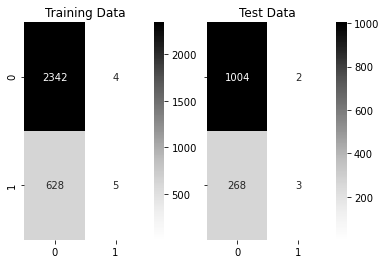

In [110]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lr)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [111]:
ytrain_predict_prob=selector.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.736161,0.263839
1,0.772472,0.227528
2,0.803930,0.196070
3,0.783378,0.216622
4,0.775062,0.224938


In [112]:
selector.score(X_train,y_train)

0.787848271231957

AUC: 0.605


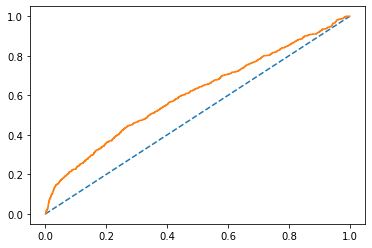

In [113]:
# predict probabilities for outlier treated dataset
probs = selector.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
traino_fpr, traino_tpr, traino_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(traino_fpr, traino_tpr);

In [114]:
ytest_predict_prob=selector.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.808926,0.191074
1,0.722974,0.277026
2,0.775220,0.224780
3,0.750773,0.249227
4,0.784141,0.215859


AUC: 0.605


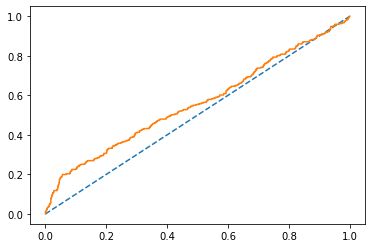

In [115]:
# predict probabilities for outlier treated dataset
probs = selector.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
testo_fpr, testo_tpr, testo_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(testo_fpr, testo_tpr);

# Logistic Regression with SMOTE

In [181]:
#from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [182]:
X_res.shape

(4692, 48)

In [183]:
selector = RFE(estimator = LogR, n_features_to_select=10, step=1)

In [184]:
selector_smote = selector.fit(X_res, y_res)

In [185]:
selector_smote.n_features_

10

In [186]:
selector_smote.ranking_

array([38, 25, 13, 20, 34, 27, 28,  1, 15,  1, 26,  1,  1,  5,  4,  9, 12,
       10, 21,  1, 16,  6,  1, 39,  1, 14, 11, 36, 31, 18,  1,  7,  8, 22,
       23, 35, 24, 33, 29, 30, 37,  1,  1, 19, 32,  3,  2, 17])

In [187]:
df = pd.DataFrame({'Feature': X_res.columns, 'Rank': selector_smote.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
7,PBDITA,1
9,Cash_profit,1
11,PBT_as_perc_of_total_income,1
12,PAT_as_perc_of_total_income,1
19,Reserves_and_funds,1
22,Deferred_tax_liability,1
24,Cumulative_retained_profits,1
30,Net_fixed_assets,1
41,WIP_turnover,1
42,Raw_material_turnover,1


In [188]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [189]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.54      0.35      0.43      2346
         1.0       0.52      0.70      0.60      2346

    accuracy                           0.53      4692
   macro avg       0.53      0.53      0.51      4692
weighted avg       0.53      0.53      0.51      4692



In [190]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.78      0.35      0.48      1006
         1.0       0.21      0.63      0.31       271

    accuracy                           0.41      1277
   macro avg       0.49      0.49      0.39      1277
weighted avg       0.65      0.41      0.44      1277



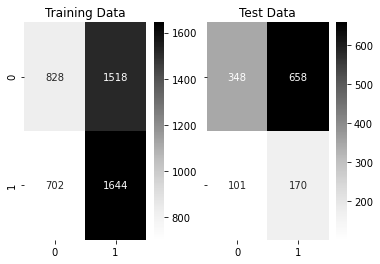

In [191]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_res,pred_train_smote)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_test_smote)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [192]:
ytrain_predict_prob=selector.predict_proba(X_res)
ytrain_predict_prob

array([[0.48073187, 0.51926813],
       [0.52895521, 0.47104479],
       [0.56546643, 0.43453357],
       ...,
       [0.4920671 , 0.5079329 ],
       [0.50873281, 0.49126719],
       [0.48049038, 0.51950962]])

In [193]:
ytest_predict_prob=selector.predict_proba(X_test)
ytest_predict_prob

array([[0.48311186, 0.51688814],
       [0.4835832 , 0.5164168 ],
       [0.53703346, 0.46296654],
       ...,
       [0.49386498, 0.50613502],
       [0.47551782, 0.52448218],
       [0.4853653 , 0.5146347 ]])

AUC: 0.546


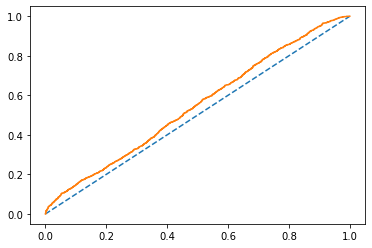

In [129]:
# predict probabilities for outlier treated dataset
probs = selector_smote.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
traino_fpr, traino_tpr, traino_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(traino_fpr, traino_tpr);

AUC: 0.546


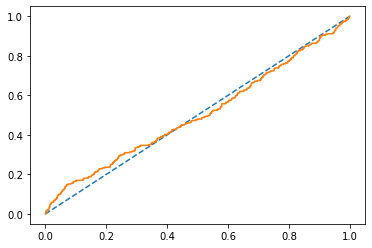

In [130]:
# predict probabilities for outlier treated dataset
probs = selector_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
testo_fpr, testo_tpr, testo_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(testo_fpr, testo_tpr);

In [131]:
selector_smote.score(X_res,y_res)

0.5268542199488491

In [132]:
selector_smote.score(X_test,y_test)

0.4056382145653876

In [133]:
np.array(ytest_predict_prob[:,1])

array([0.51688814, 0.5164168 , 0.46296654, ..., 0.50613502, 0.52448218,
       0.5146347 ])

0.1 

Accuracy Score 0.2138
Recall Score 0.9889 

Confusion Matrix


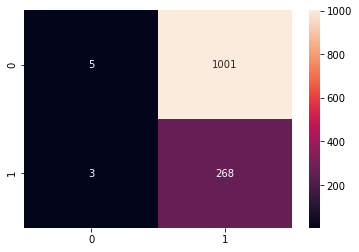

0.2 

Accuracy Score 0.2138
Recall Score 0.9852 

Confusion Matrix


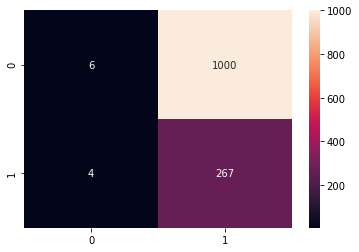

0.3 

Accuracy Score 0.2177
Recall Score 0.9779 

Confusion Matrix


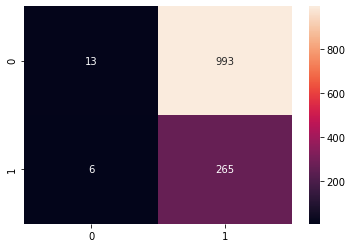

0.4 

Accuracy Score 0.2279
Recall Score 0.9631 

Confusion Matrix


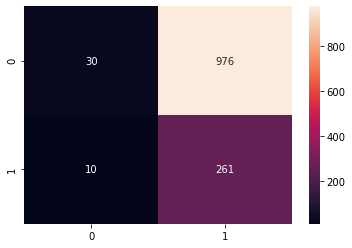

0.5 

Accuracy Score 0.4056
Recall Score 0.6273 

Confusion Matrix


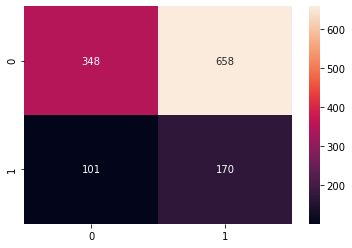

0.6 

Accuracy Score 0.7854
Recall Score 0.0406 

Confusion Matrix


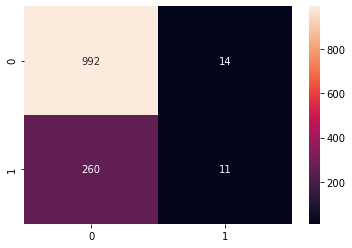

0.7 

Accuracy Score 0.7862
Recall Score 0.0185 

Confusion Matrix


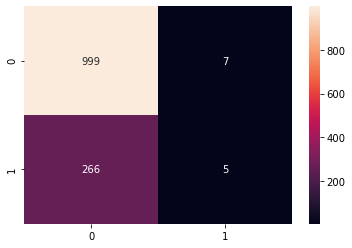

0.8 

Accuracy Score 0.7894
Recall Score 0.0185 

Confusion Matrix


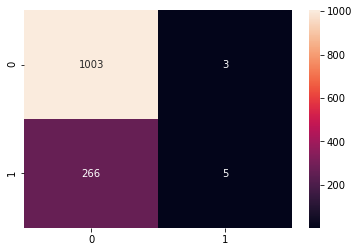

0.9 

Accuracy Score 0.787
Recall Score 0.0037 

Confusion Matrix


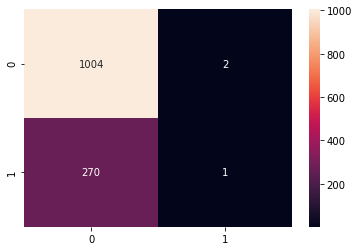

In [194]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the train data
        if np.array(ytest_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.1 

Accuracy Score 0.5038
Recall Score 1.0 

Confusion Matrix


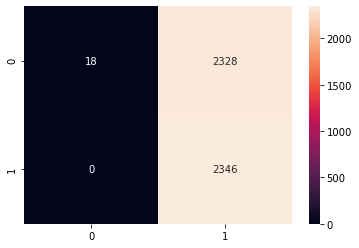

0.2 

Accuracy Score 0.5049
Recall Score 0.9983 

Confusion Matrix


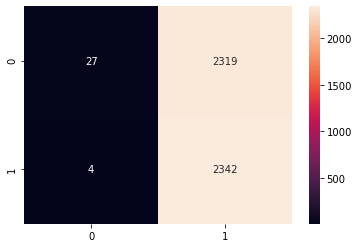

0.3 

Accuracy Score 0.5104
Recall Score 0.9953 

Confusion Matrix


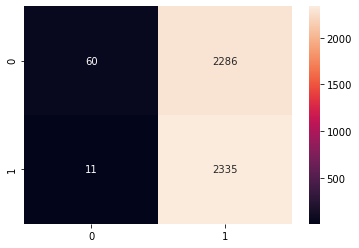

0.4 

Accuracy Score 0.5156
Recall Score 0.9868 

Confusion Matrix


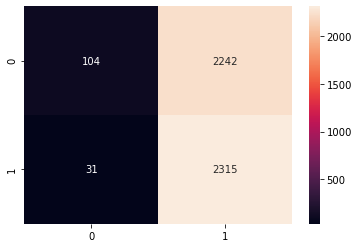

0.5 

Accuracy Score 0.5269
Recall Score 0.7008 

Confusion Matrix


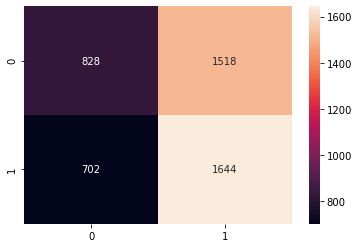

0.6 

Accuracy Score 0.5085
Recall Score 0.0239 

Confusion Matrix


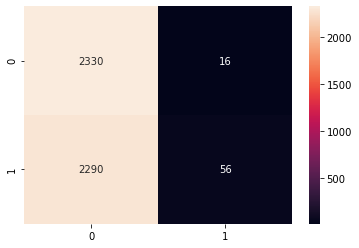

0.7 

Accuracy Score 0.5058
Recall Score 0.0132 

Confusion Matrix


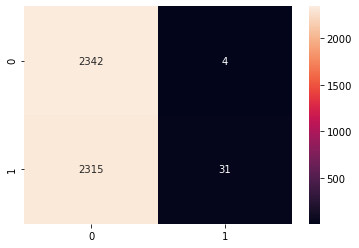

0.8 

Accuracy Score 0.5032
Recall Score 0.0077 

Confusion Matrix


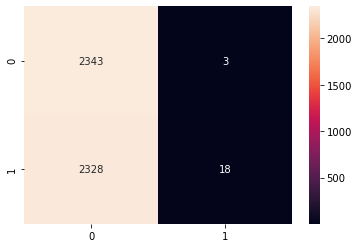

0.9 

Accuracy Score 0.5019
Recall Score 0.0043 

Confusion Matrix


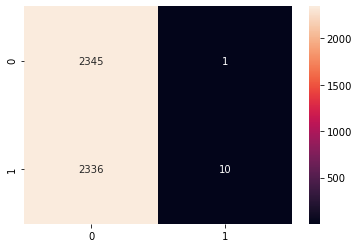

In [136]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_res)):#defining a loop for the length of the train data
        if np.array(ytrain_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_res,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(y_res,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_res,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

# LDA with SMOTE

In [137]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()

In [138]:
model=clf.fit(X_res,y_res)

In [139]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_res)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

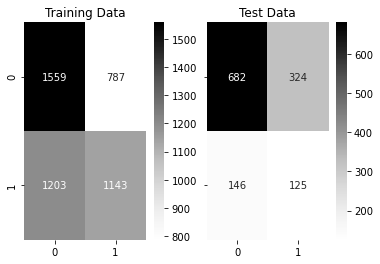

In [140]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_res,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [141]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_res,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.56      0.66      0.61      2346
         1.0       0.59      0.49      0.53      2346

    accuracy                           0.58      4692
   macro avg       0.58      0.58      0.57      4692
weighted avg       0.58      0.58      0.57      4692
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.82      0.68      0.74      1006
         1.0       0.28      0.46      0.35       271

    accuracy                           0.63      1277
   macro avg       0.55      0.57      0.55      1277
weighted avg       0.71      0.63      0.66      1277
 



In [142]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_res)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.612
AUC for the Test Data: 0.577


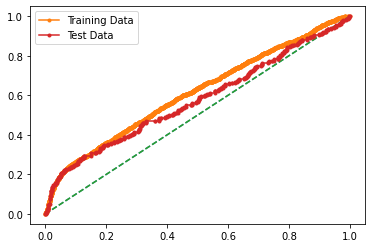

In [143]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_res,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Bivariate after model finalisation

<AxesSubplot:xlabel='default', ylabel='PBDITA'>

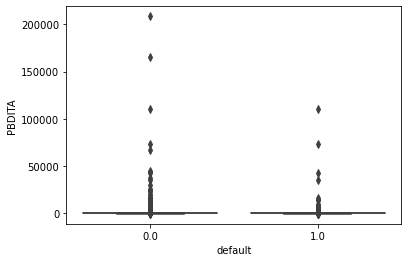

In [195]:
sns.boxplot(x=p2['default'] , y=p2["PBDITA"])

<AxesSubplot:xlabel='default', ylabel='Cash_profit'>

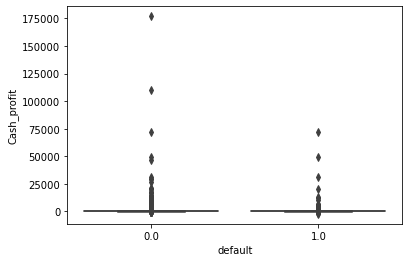

In [196]:
sns.boxplot(x=p2['default'] , y=p2["Cash_profit"])

<AxesSubplot:xlabel='default', ylabel='Reserves_and_funds'>

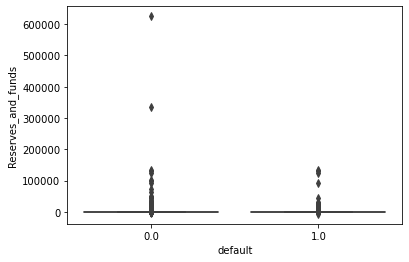

In [198]:
sns.boxplot(x=p2['default'] , y=p2["Reserves_and_funds"])

<AxesSubplot:xlabel='default', ylabel='Deferred_tax_liability'>

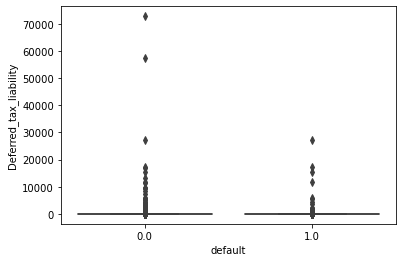

In [199]:
sns.boxplot(x=p2['default'] , y=p2["Deferred_tax_liability"])

<AxesSubplot:xlabel='default', ylabel='Cumulative_retained_profits'>

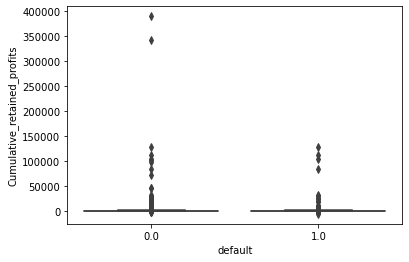

In [200]:
sns.boxplot(x=p2['default'] , y=p2["Cumulative_retained_profits"])

<AxesSubplot:xlabel='default', ylabel='Net_fixed_assets'>

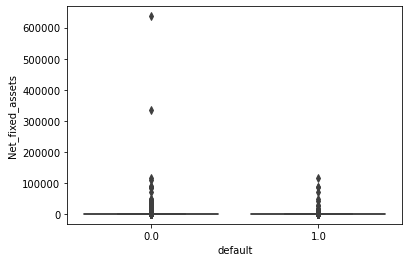

In [201]:
sns.boxplot(x=p2['default'] , y=p2["Net_fixed_assets"])

<AxesSubplot:xlabel='default', ylabel='WIP_turnover'>

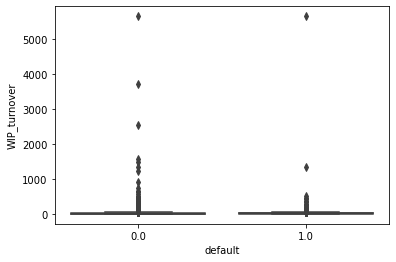

In [202]:
sns.boxplot(x=p2['default'] , y=p2["WIP_turnover"])